# Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Load data

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
df=pd.read_excel(r"C:\Users\uzuma\Downloads\Flight_price.xlsx")

In [4]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# EDA

In [5]:
df.shape

(10683, 11)

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.select_dtypes(include="O").columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [8]:
df.select_dtypes(exclude="O").columns

Index(['Price'], dtype='object')

In [9]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
df.duplicated().sum()

220

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
for i  in df.select_dtypes(include="O").columns:
    print(f"------valuecounts----{i}")
    print(df[i].value_counts())

------valuecounts----Airline
Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
------valuecounts----Date_of_Journey
Date_of_Journey
6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
24/06/2019    330
1/06/2019     330
3/06/2019     326
15/06/2019    314
24/03/2019    314
6/03/2019     302
27/03/2019    290
24/05/2019    286
6/05/2019     282
1/05/2019     274
12/05/2019    259
1/

In [14]:
df.drop("Additional_Info",axis=1,inplace=True)

In [15]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662


In [16]:
cols=df.columns

In [17]:
df=df.dropna(subset=cols)

In [18]:
df["Airline"].dtype

dtype('O')

In [19]:
df["Date_of_Journey"]

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10462, dtype: object

In [20]:
from datetime import datetime

In [21]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [22]:
df["Day"]=df["Date_of_Journey"].dt.day
df["year"]=df["Date_of_Journey"].dt.year
df["month"]=df["Date_of_Journey"].dt.month

In [23]:
df=df.rename(columns={"Day":"Journey_day"})
df=df.rename(columns={"month":"Journey_month"})

In [24]:
df["Dep_Time"]

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10462, dtype: object

In [25]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])

In [26]:
df["Day"]=df["Dep_Time"].dt.day
df["Date"]=df["Dep_Time"].dt.date
df["hour"]=df["Dep_Time"].dt.hour
df["minute"]=df["Dep_Time"].dt.minute
df["year"]=df["Dep_Time"].dt.year
df["month"]=df["Dep_Time"].dt.month

In [27]:
df=df.rename(columns={"Day":"Dep_day"})
df=df.rename(columns={"hour":"Dep_hour"})
df=df.rename(columns={"minute":"Dep_min"})
df=df.rename(columns={"year":"Dep_year"})


In [28]:
remove=["Date_of_Journey","Route","Dep_Time","Date","month","Route"]

In [29]:
df.drop(remove,axis=1,inplace=True)

In [30]:
df["Arrival_Time"]=pd.to_datetime(df['Arrival_Time'])

In [31]:
df["Date"]=df["Arrival_Time"].dt.date
df["hour"]=df["Arrival_Time"].dt.hour
df["minute"]=df["Arrival_Time"].dt.minute
df["month"]=df["Arrival_Time"].dt.month

In [32]:

df=df.rename(columns={"hour":"Arrival_hour"})
df=df.rename(columns={"minute":"Arrival_min"})



In [33]:
df

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Dep_year,Journey_month,Dep_day,Dep_hour,Dep_min,Date,Arrival_hour,Arrival_min,month
0,IndiGo,Banglore,New Delhi,2024-03-22 01:10:00,2h 50m,non-stop,3897,24,2024,3,1,22,20,2024-03-22,1,10,3
1,Air India,Kolkata,Banglore,2024-09-01 13:15:00,7h 25m,2 stops,7662,1,2024,5,1,5,50,2024-09-01,13,15,9
2,Jet Airways,Delhi,Cochin,2024-06-10 04:25:00,19h,2 stops,13882,9,2024,6,1,9,25,2024-06-10,4,25,6
3,IndiGo,Kolkata,Banglore,2024-09-01 23:30:00,5h 25m,1 stop,6218,12,2024,5,1,18,5,2024-09-01,23,30,9
4,IndiGo,Banglore,New Delhi,2024-09-01 21:35:00,4h 45m,1 stop,13302,1,2024,3,1,16,50,2024-09-01,21,35,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2024-09-01 22:25:00,2h 30m,non-stop,4107,9,2024,4,1,19,55,2024-09-01,22,25,9
10679,Air India,Kolkata,Banglore,2024-09-01 23:20:00,2h 35m,non-stop,4145,27,2024,4,1,20,45,2024-09-01,23,20,9
10680,Jet Airways,Banglore,Delhi,2024-09-01 11:20:00,3h,non-stop,7229,27,2024,4,1,8,20,2024-09-01,11,20,9
10681,Vistara,Banglore,New Delhi,2024-09-01 14:10:00,2h 40m,non-stop,12648,1,2024,3,1,11,30,2024-09-01,14,10,9


In [34]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

Duration_hrs = []
Duration_mins = []

for i in range(len(duration)):
    hours = int(duration[i].split("h")[0].strip())
    minutes = int(duration[i].split("h")[1].split("m")[0].strip())
    
    Duration_hrs.append(hours)
    Duration_mins.append(minutes)

In [35]:
df["Duration_hrs"]=Duration_hrs
df["Duration_mins"]=Duration_mins

In [36]:
re=["Date","month","Dep_year","Arrival_Time","Duration","Dep_day"]

In [37]:
df.drop(re,axis=1,inplace=True)

In [38]:
df.head(1)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50


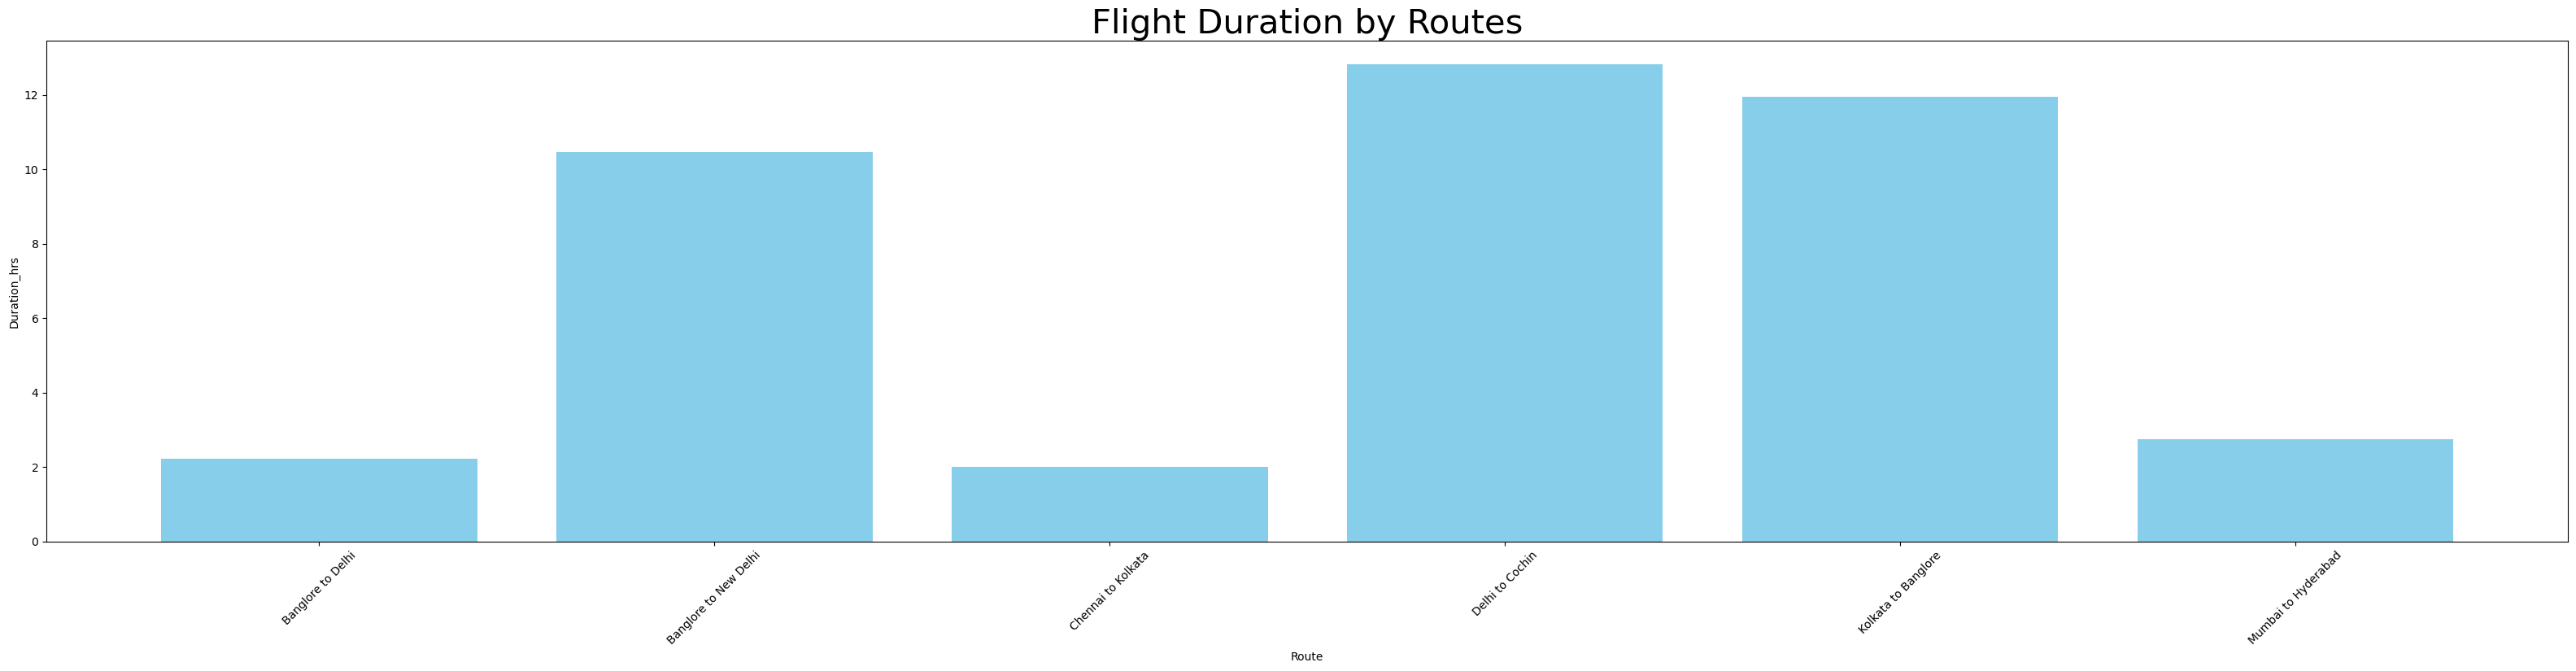

In [39]:
# Flight Duration by Routes
data = df.groupby(["Source", "Destination"])["Duration_hrs"].mean().reset_index()
plt.figure(figsize=(40, 8))
plt.bar(data["Source"] + ' to ' + data["Destination"], data["Duration_hrs"], color='skyblue')
plt.xlabel("Route")
plt.ylabel("Duration_hrs")
plt.title('Flight Duration by Routes',fontsize=30,color="black")
plt.xticks(rotation=45)
plt.show()


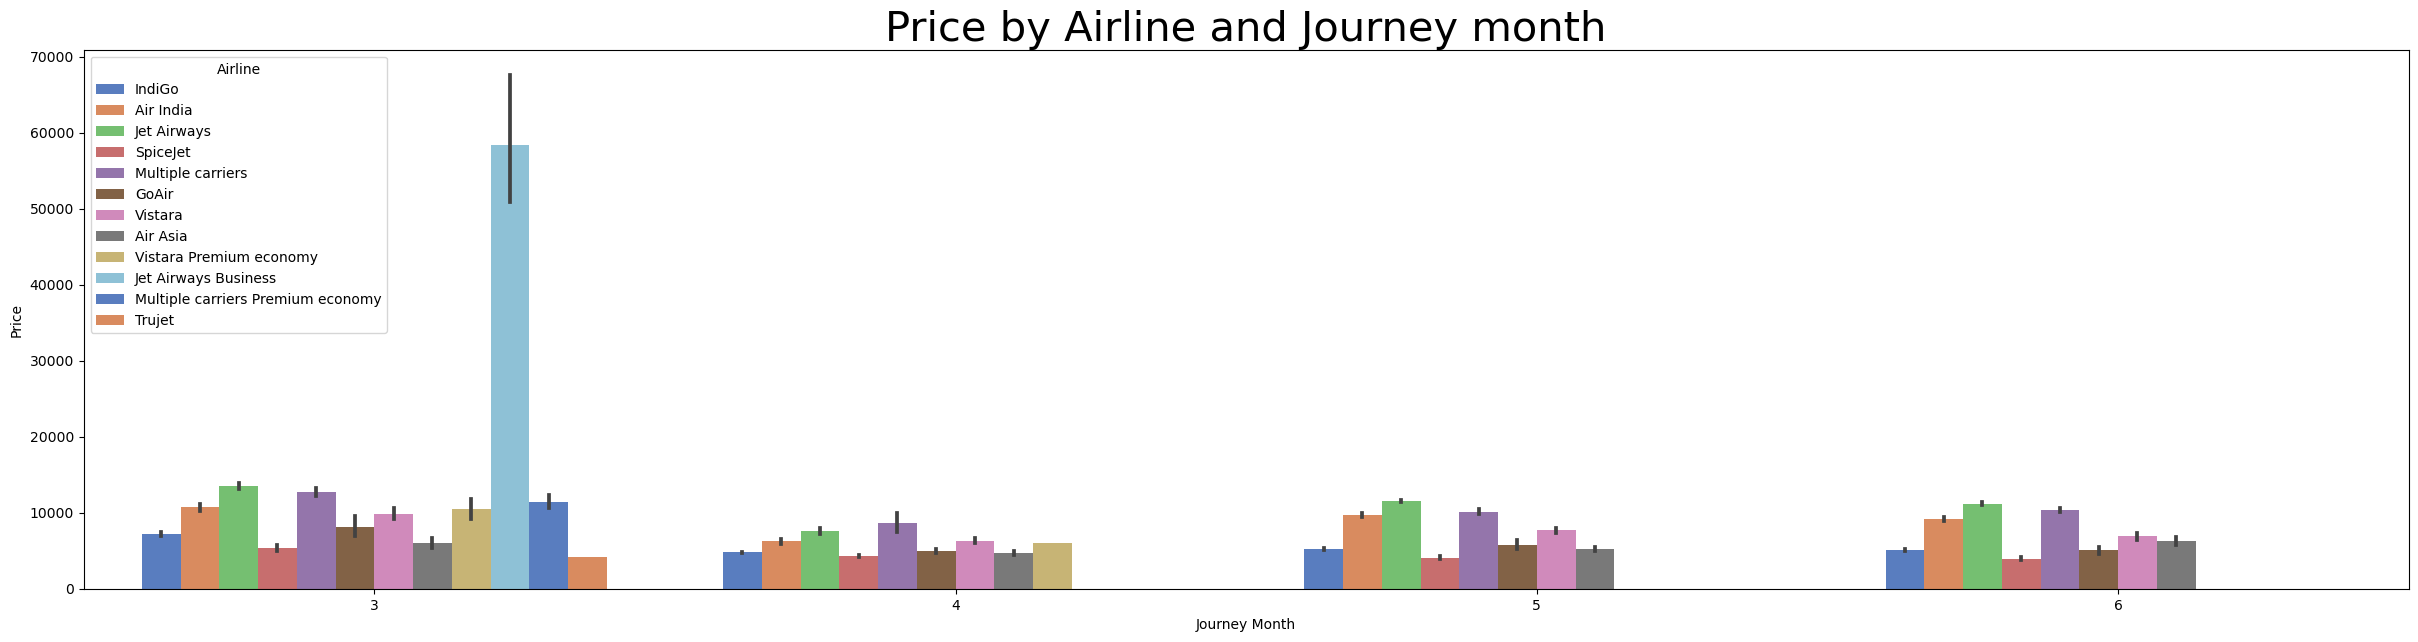

In [40]:
# Price by Airline and Journey month
plt.figure(figsize=(30,7))
sns.barplot(x='Journey_month', y='Price', hue='Airline', data=df, palette=sns.color_palette("muted"))
plt.title('Price by Airline and Journey month',fontsize=30,color="black")
plt.xlabel('Journey Month')
plt.ylabel('Price')
plt.legend(title='Airline')
plt.show()

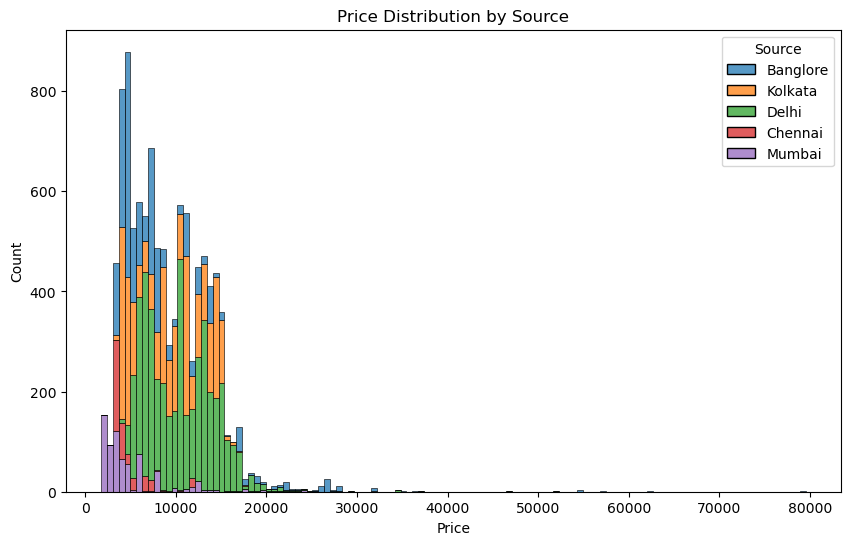

In [41]:
# Price distribution by source
plt.figure(figsize=(10,6))
sns.histplot(x='Price', hue='Source', data=df, multiple='stack')
plt.title('Price Distribution by Source')
plt.show()

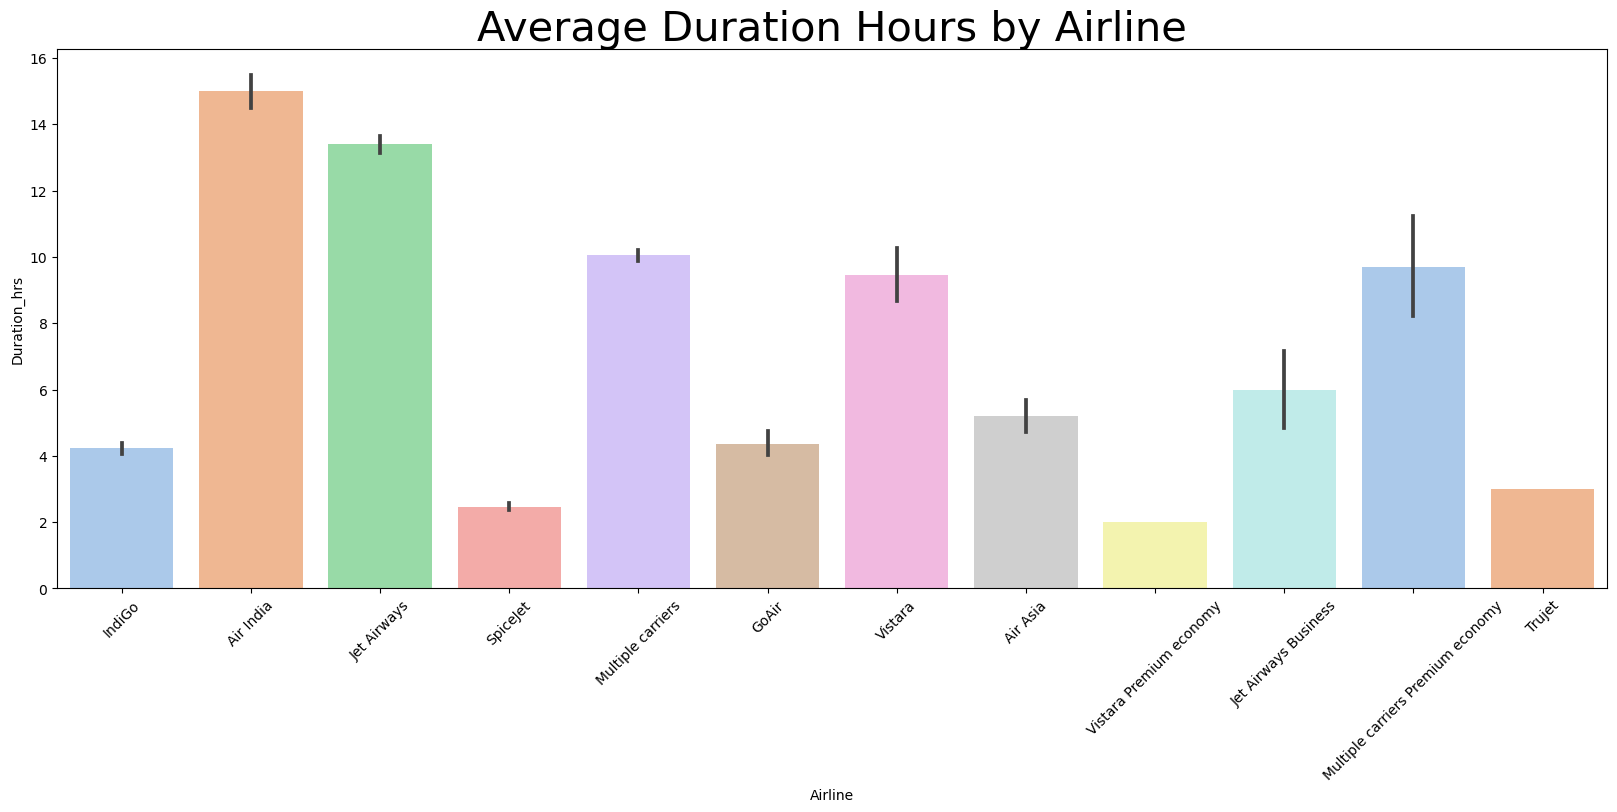

In [42]:
plt.figure(figsize=(20,7))
sns.barplot(x='Airline', y='Duration_hrs', data=df,palette="pastel")
plt.title('Average Duration Hours by Airline',fontsize=30)
plt.xticks(rotation=45)
plt.show()

# Encode data

In [43]:
df.head(5)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [44]:
for i in df.select_dtypes(include="O").columns:
    print(f"------Value_Counts----{i}")
    print(df[i].value_counts())

------Value_Counts----Airline
Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
------Value_Counts----Source
Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64
------Value_Counts----Destination
Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64
------Value_Counts----Total_Stops
Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops 

In [45]:
df["Source"]=df["Source"].map({"Delhi":0,"Kolkata":1,"Banglore":2,"Mumbai":3,"Chennai":4})

In [46]:
df["Total_Stops"]=df["Total_Stops"].map({"1 stop":1,"non-stop":0,"2 stops":2
                                         ,"3 stops":3,"4 stops":4})

In [47]:
df["Destination"]=df["Destination"].map({"Cochin":1,"Banglore":2,"Delhi":3,"New Delhi":4,
                                         "Hyderabad":5,"Kolkata":6})

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le=LabelEncoder()

In [50]:
df["Airline"]=le.fit_transform(df["Airline"])
df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hrs,Duration_mins
0,3,2,4,0,3897,24,3,22,20,1,10,2,50
1,1,1,2,2,7662,1,5,5,50,13,15,7,25
2,4,0,1,2,13882,9,6,9,25,4,25,19,0
3,3,1,2,1,6218,12,5,18,5,23,30,5,25
4,3,2,4,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,1,2,0,4107,9,4,19,55,22,25,2,30
10679,1,1,2,0,4145,27,4,20,45,23,20,2,35
10680,4,2,3,0,7229,27,4,8,20,11,20,3,0
10681,10,2,4,0,12648,1,3,11,30,14,10,2,40


# Training our Data

In [51]:
x=df.drop("Price",axis=1)
y=df["Price"]

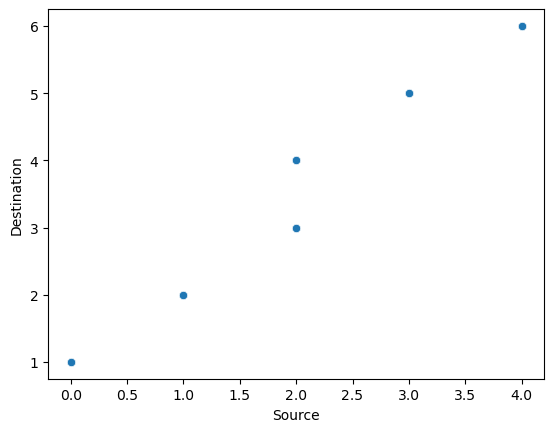

In [52]:
sns.scatterplot(x="Source",y="Destination",data=df)
plt.show()

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
mn=MinMaxScaler()

In [55]:
x= mn.fit_transform(x)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2,shuffle=True)

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rfr=RandomForestRegressor(n_estimators=100, min_samples_split=10,random_state=0)

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [66]:
grid = {
    'criterion': ['squared_error'],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': list(range(2, 11)),  
    'min_samples_leaf': list(range(1, 11)),
    'max_features': [0.5, 0.7, 1.0],  
    'bootstrap': [True, False]}

In [67]:
rscv=RandomizedSearchCV(estimator=rfr,param_distributions=grid,cv=5)

In [69]:
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(min_samples_split=10,
                                                   random_state=0),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error'],
                                        'max_depth': [10, 20, 30, 40],
                                        'max_features': [0.5, 0.7, 1.0],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [71]:
rscv.score(x_train,y_train)

0.8977057217968362

In [72]:
rscv.score(x_test,y_test)

0.8253999363347202

In [73]:
pred=rscv.predict(x_test)

In [74]:
pred

array([14799.09701997,  3851.7469022 ,  4311.76931554, ...,
       11159.64480813,  8545.61280184, 12719.44355007])

In [75]:
result=pd.DataFrame(pred,columns=["Base_Model"])

In [76]:
result["Actual_value"]=np.array(y_test)
result

,Base_Model,Actual_value
0,14799.097020,17996
1,3851.746902,3873
2,4311.769316,4462
3,4481.651794,2228
4,4344.344113,4991
...,...,...
2088,12841.892712,12898
2089,14468.805639,12898
2090,11159.644808,11627
2091,8545.612802,6795


In [77]:
result["Error"]= result["Base_Model"]-result["Actual_value"]

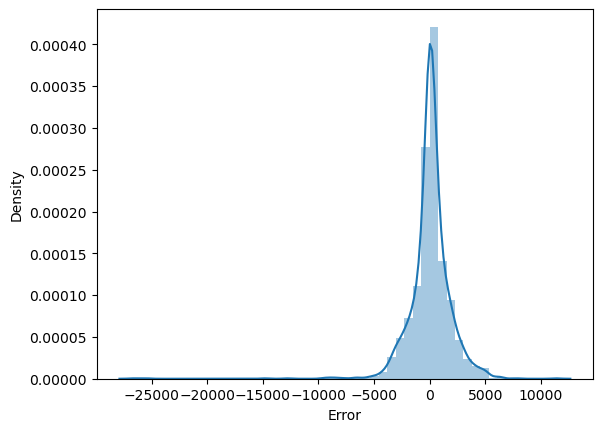

In [78]:
sns.distplot(result["Error"],bins=50)
plt.show()

In [79]:
from sklearn.linear_model  import Ridge

In [80]:
ridge=Ridge(alpha=0.5)

In [81]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.5)

In [82]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.5)

In [83]:
ridge_pred=ridge.predict(x_test)

In [84]:
ridge_pred

array([12884.741395  ,  6755.14301   ,  5250.40370902, ...,
       11152.29712263, 10694.25965709, 10876.75317759])

In [85]:
ridge.score(x_train,y_train)

0.42984876388839355

In [86]:
ridge.score(x_test,y_test)

0.4490668748679213

In [87]:
result["Ridge_prediction"]= ridge_pred
result

,Base_Model,Actual_value,Error,Ridge_prediction
0,14799.097020,17996,-3196.902980,12884.741395
1,3851.746902,3873,-21.253098,6755.143010
2,4311.769316,4462,-150.230684,5250.403709
3,4481.651794,2228,2253.651794,5710.669827
4,4344.344113,4991,-646.655887,4487.185783
...,...,...,...,...
2088,12841.892712,12898,-56.107288,9610.963203
2089,14468.805639,12898,1570.805639,8682.028758
2090,11159.644808,11627,-467.355192,11152.297123
2091,8545.612802,6795,1750.612802,10694.259657


In [88]:
from sklearn.metrics import r2_score

In [90]:
prediction=rscv.predict(x_test)

In [91]:
r2=r2_score(prediction,y_test)

In [92]:
r2

0.7928563907775097